In [35]:
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


from datetime import datetime,timedelta
from dateutil import relativedelta

In [1]:
import json

In [3]:
with open("InsetChart.json","r") as f:
    d=json.load(f)

In [8]:
df = pd.read_csv("C:/Users/joshsu/OneDrive - Bill & Melinda Gates Foundation/Code/emod-genepi-archetypes/run_sims/Assets/magude_prevalence.csv")

In [9]:
df

,survey-date,N_pos,N,pos_frac,pos_frac_low,pos_frac_high
0,2015-05-24,91,1017,0.0890,0.072383,0.108401
1,2015-11-13,1302,34680,0.0380,0.035567,0.039597
2,2016-01-23,73,5397,0.0135,0.010617,0.016977
3,2016-05-15,18,1536,0.0117,0.006960,0.018458
4,2017-05-08,92,3240,0.0280,0.022979,0.034746


In [51]:
df['y_err_lower'] = df['pos_frac'] - df['pos_frac_low']
df['y_err_upper'] = df['pos_frac_high'] - df['pos_frac']

In [14]:
sim_df = pd.DataFrame({
    "t": np.arange(len(d['Channels']['PfHRP2 Prevalence']['Data'])),
    "prev": d['Channels']['PfHRP2 Prevalence']['Data']})

In [15]:
sim_df["prev"]

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
21895    0.306306
21896    0.307307
21897    0.310310
21898    0.316316
21899    0.318318
Name: prev, Length: 21900, dtype: float64

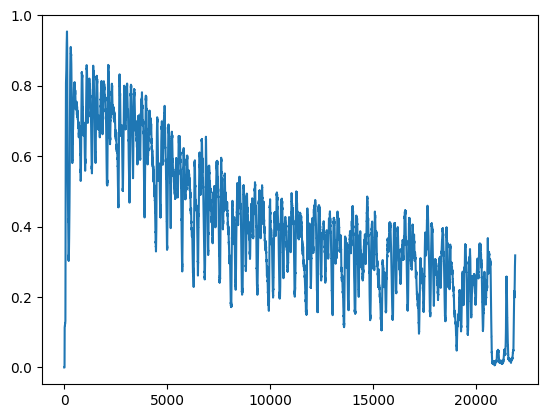

In [17]:
plt.plot(sim_df["prev"])

In [32]:
def convert_to_date_365(convert_day, ref_date, date_format="%Y-%m-%d"):
    # Converts day of simulation starting from reference date into date
    # Assumes a calendar year has exactly 365 days

    convert_year = int(int(convert_day) / 365) + datetime.strptime(ref_date, date_format).year
    convert_day = convert_day - int(int(convert_day) / 365) * 365
    return datetime.strftime(datetime(convert_year, 1, 1) + timedelta(convert_day - 1), date_format)


In [27]:
sim_start_year = 2019-60
sim_df["date"] = sim_df["t"].apply(lambda x: convert_to_date(x, f"{sim_start_year}-01-01"))

In [30]:
sim_df

,t,prev,date
0,0,0.000000,1959-01-01
1,1,0.000000,1959-01-02
2,2,0.000000,1959-01-03
3,3,0.000000,1959-01-04
4,4,0.000000,1959-01-05
...,...,...,...
21895,21895,0.306306,2018-12-12
21896,21896,0.307307,2018-12-13
21897,21897,0.310310,2018-12-14
21898,21898,0.316316,2018-12-15


In [36]:
sim_df["date"] = sim_df["t"].apply(lambda x: convert_to_date_365(x, f"{sim_start_year}-01-01"))

    # # Plot comparison
    # plt.figure(figsize=(10, 5), dpi=200)
    # plt.plot_date(pd.to_datetime(df_sim["date"]), df_sim["pos_frac_sim"], ls='-', marker=None)


C:\Users\joshsu\AppData\Local\Temp\ipykernel_28500\2960106405.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(pd.to_datetime(sim_df["date"]), sim_df["prev"], ls='-', marker=None)


<ErrorbarContainer object of 3 artists>

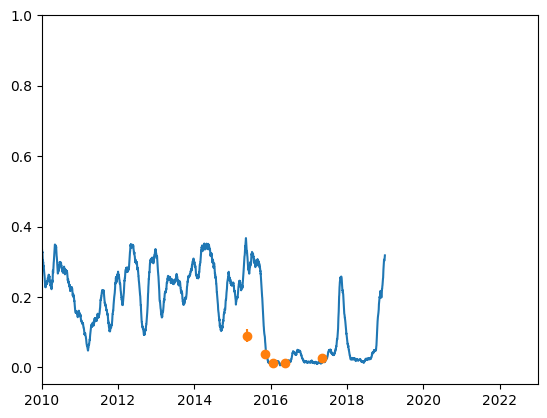

In [52]:
plt.plot_date(pd.to_datetime(sim_df["date"]), sim_df["prev"], ls='-', marker=None)
plt.xlim([mdates.datestr2num("2010-01-01"), mdates.datestr2num("2023-01-01")])
plt.errorbar(x=pd.to_datetime(df["survey-date"]), y=df.pos_frac, yerr=[df['y_err_lower'], df['y_err_upper']], fmt='o', c="C1",
                 label="School survey (ages 6-15)")

In [44]:
df

,survey-date,N_pos,N,pos_frac,pos_frac_low,pos_frac_high
0,2015-05-24,91,1017,0.0890,0.072383,0.108401
1,2015-11-13,1302,34680,0.0380,0.035567,0.039597
2,2016-01-23,73,5397,0.0135,0.010617,0.016977
3,2016-05-15,18,1536,0.0117,0.006960,0.018458
4,2017-05-08,92,3240,0.0280,0.022979,0.034746


<ErrorbarContainer object of 3 artists>

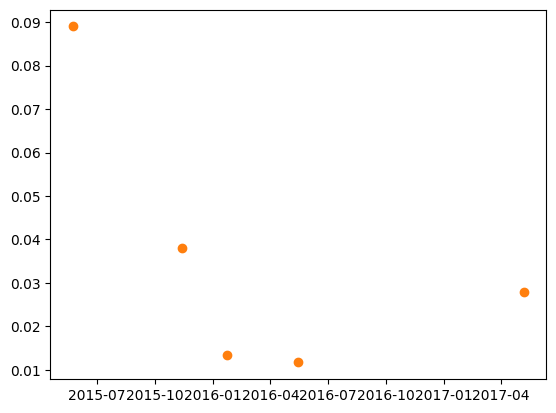

In [48]:
plt.errorbar(x=pd.to_datetime(df["survey-date"]), y=df.pos_frac, yerr=0, fmt='o', c="C1",
                 label="School survey (ages 6-15)")

In [46]:
df

,survey-date,N_pos,N,pos_frac,pos_frac_low,pos_frac_high
0,2015-05-24,91,1017,0.0890,0.072383,0.108401
1,2015-11-13,1302,34680,0.0380,0.035567,0.039597
2,2016-01-23,73,5397,0.0135,0.010617,0.016977
3,2016-05-15,18,1536,0.0117,0.006960,0.018458
4,2017-05-08,92,3240,0.0280,0.022979,0.034746


In [40]:
pd.to_datetime(sim_df["date"])

0       1958-12-31
1       1959-01-01
2       1959-01-02
3       1959-01-03
4       1959-01-04
           ...    
21895   2018-12-26
21896   2018-12-27
21897   2018-12-28
21898   2018-12-29
21899   2018-12-30
Name: date, Length: 21900, dtype: datetime64[ns]